<a href="https://colab.research.google.com/github/omniaghazy/Machine-Learning-Algorithms/blob/main/Bank_Marketing_Dataset_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
!pip install catboost

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df = pd.read_csv("/content/bank-full.csv", sep=";")

In [207]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [209]:
df.head(
)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [210]:
for col in df:
    print(f"{col} has nunique = {df[col].nunique()}")

    print(df[col].unique())

age has nunique = 77
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job has nunique = 12
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital has nunique = 3
['married' 'single' 'divorced']
education has nunique = 4
['tertiary' 'secondary' 'unknown' 'primary']
default has nunique = 2
['no' 'yes']
balance has nunique = 7168
[ 2143    29     2 ...  8205 14204 16353]
housing has nunique = 2
['yes' 'no']
loan has nunique = 2
['no' 'yes']
contact has nunique = 3
['unknown' 'cellular' 'telephone']
day has nunique = 31
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month has nunique = 12
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 's

In [211]:
df.shape

(45211, 17)

In [212]:
for col in df:
    if df[col].nunique() < 4 :
        print(col)

        print(df[col].value_counts(normalize = True))
        print("==="*8)


marital
marital
married     0.601933
single      0.282896
divorced    0.115171
Name: proportion, dtype: float64
default
default
no     0.981973
yes    0.018027
Name: proportion, dtype: float64
housing
housing
yes    0.555838
no     0.444162
Name: proportion, dtype: float64
loan
loan
no     0.839774
yes    0.160226
Name: proportion, dtype: float64
contact
contact
cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: proportion, dtype: float64
y
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


In [213]:
df.duplicated().sum()

np.int64(0)

In [214]:
df.drop_duplicates(inplace = True)

In [215]:
df.duplicated().sum()

np.int64(0)

In [216]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [217]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [218]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [219]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [220]:
df.shape

(45211, 17)

In [221]:
num = df.select_dtypes(np.number)
num.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [222]:
for col in num:
    print(col)
    print(f"min = {df[col].min()  }====>max ={df[col].max()} ")

age
min = 18====>max =95 
balance
min = -8019====>max =102127 
day
min = 1====>max =31 
duration
min = 0====>max =4918 
campaign
min = 1====>max =63 
pdays
min = -1====>max =871 
previous
min = 0====>max =275 


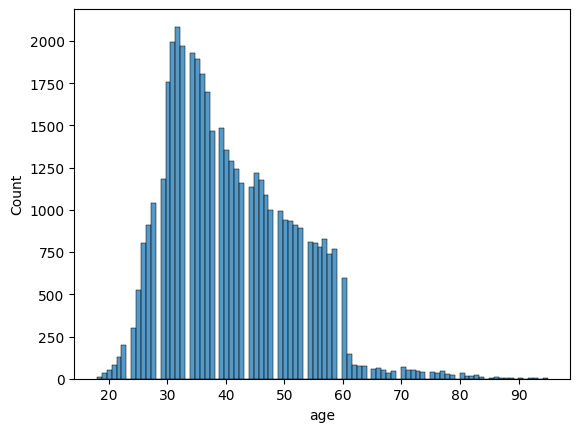

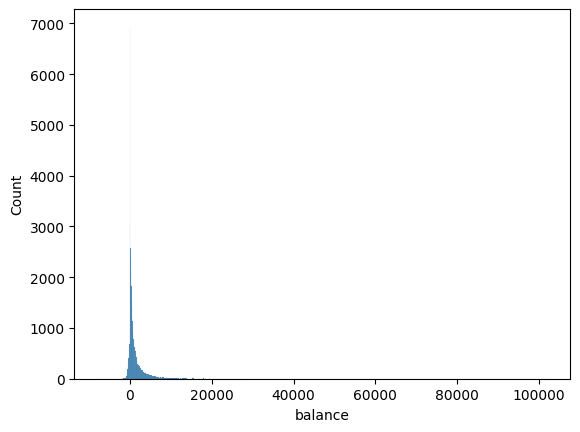

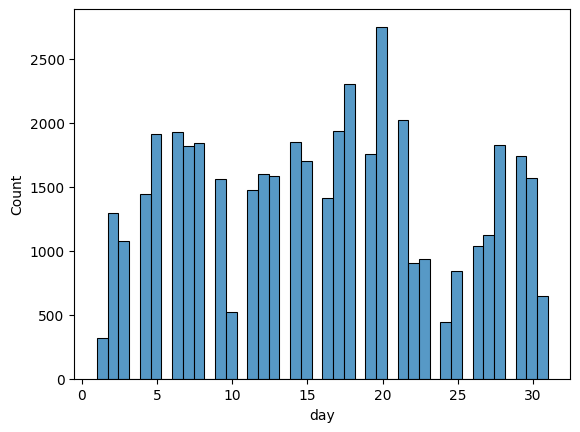

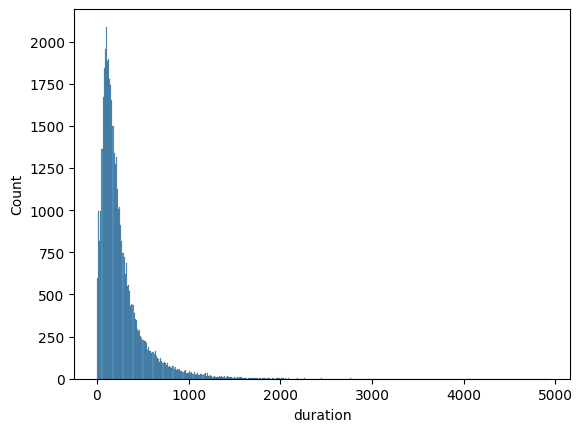

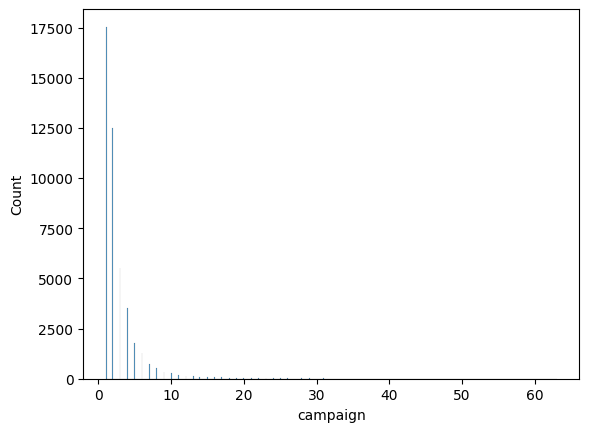

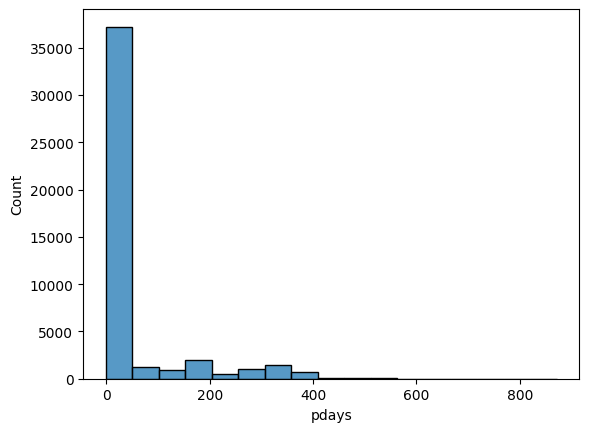

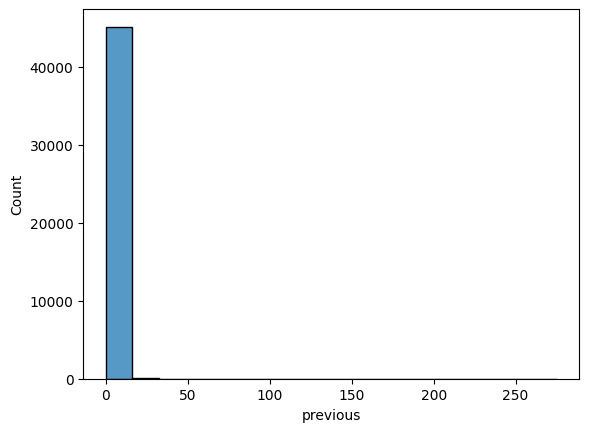

In [223]:
for col in num :
  sns.histplot(df[col])
  plt.show()


In [224]:
for col in num:
    print(col)
    print(f"min = {df[col].min()  }====>max ={df[col].max()} .....nunique ={df[col].nunique()} ")

age
min = 18====>max =95 .....nunique =77 
balance
min = -8019====>max =102127 .....nunique =7168 
day
min = 1====>max =31 .....nunique =31 
duration
min = 0====>max =4918 .....nunique =1573 
campaign
min = 1====>max =63 .....nunique =48 
pdays
min = -1====>max =871 .....nunique =559 
previous
min = 0====>max =275 .....nunique =41 


In [225]:
num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

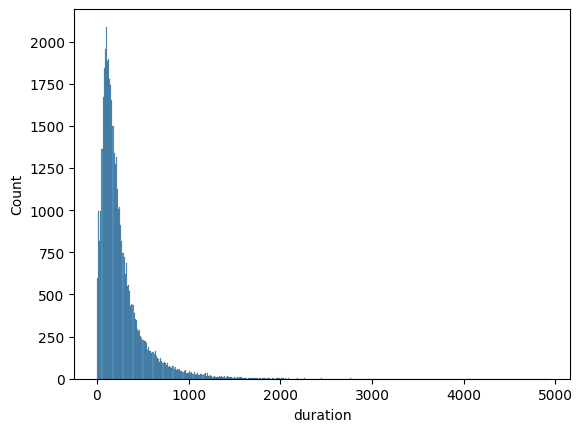

In [226]:
num2 = df[["duration"]]
for col in num2 :
    sns.histplot(df[col])
    plt.show()
    df[col] =np.log1p(df[col])

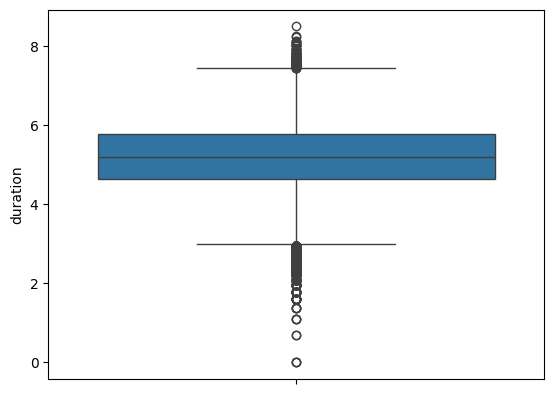

In [227]:
for col in num2 :
    sns.boxplot(df[col])
    plt.show()


In [228]:
for col in num:
  if col not in ['age', 'day', 'campaign', 'pdays', 'previous']:


            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR

            df[col] = np.where(
                df[col] > upper_limit,
                upper_limit,
                df[col]
            )

            df[col] = np.where(
                df[col] < lower_limit,
                lower_limit,
                df[col]
            )

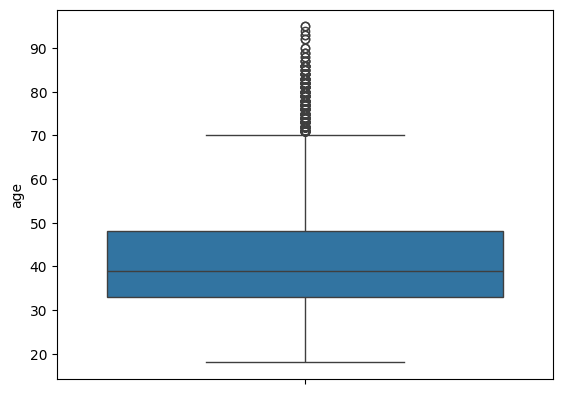

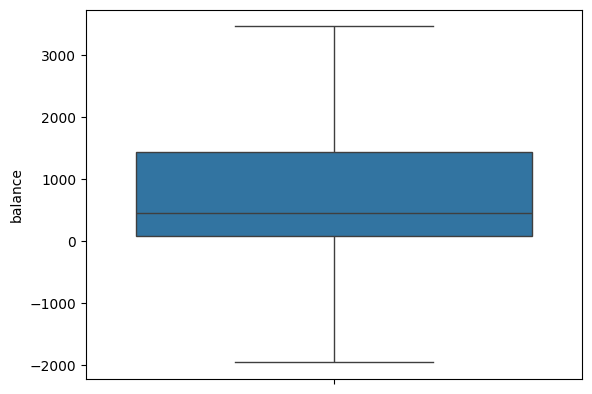

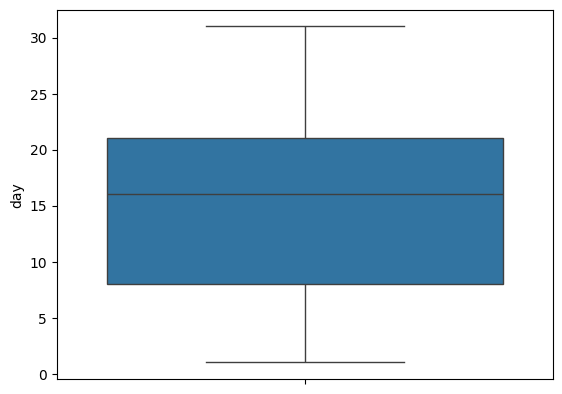

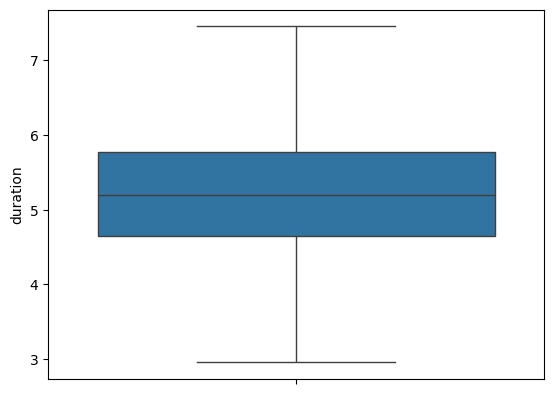

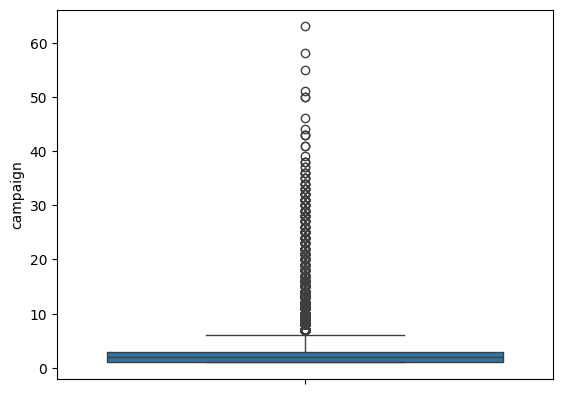

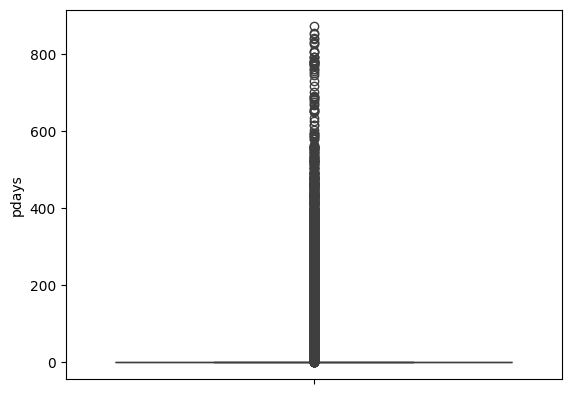

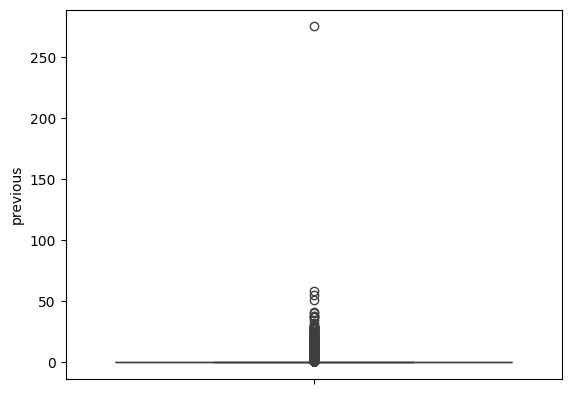

In [229]:
for col in num :
    sns.boxplot(df[col])
    plt.show()


In [230]:
cat = df.select_dtypes("object")
cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


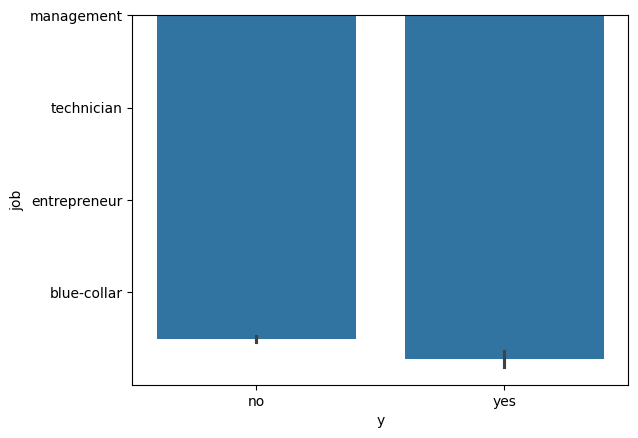

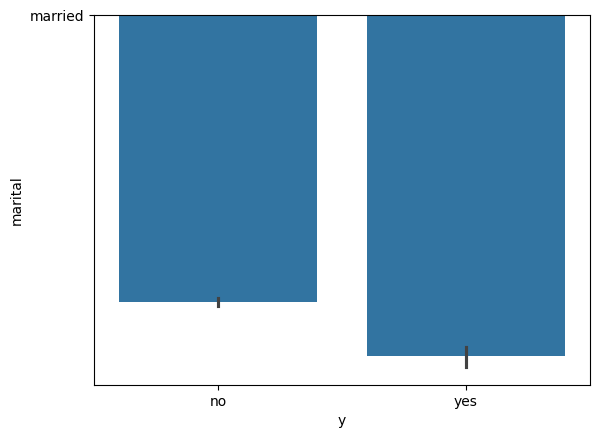

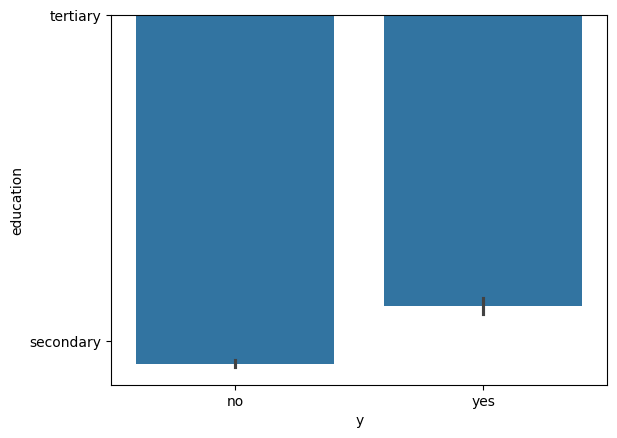

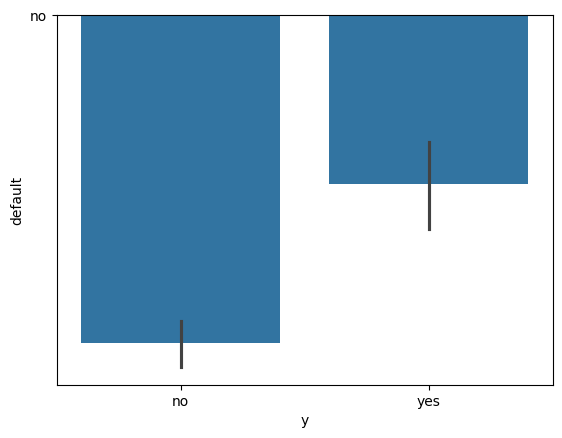

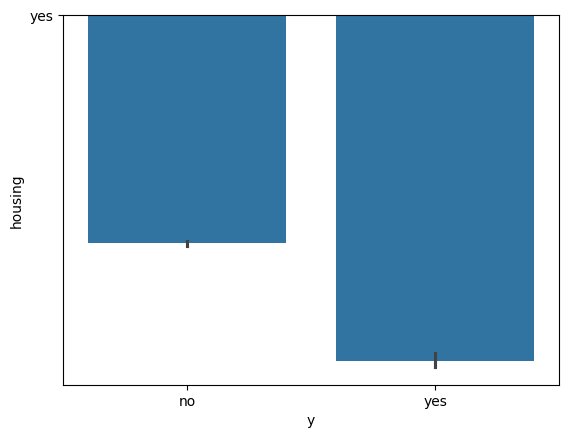

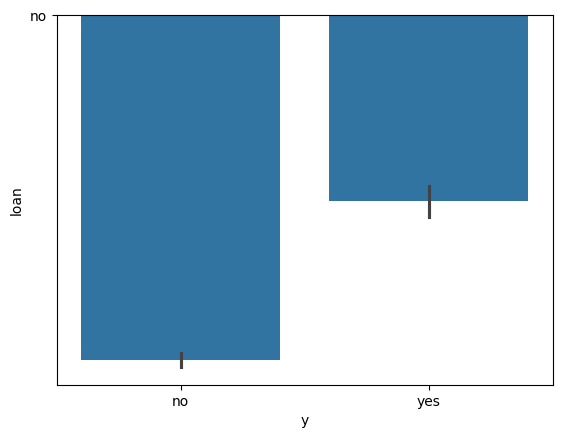

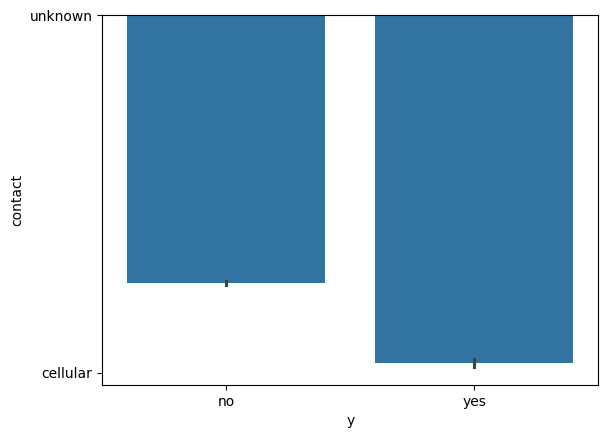

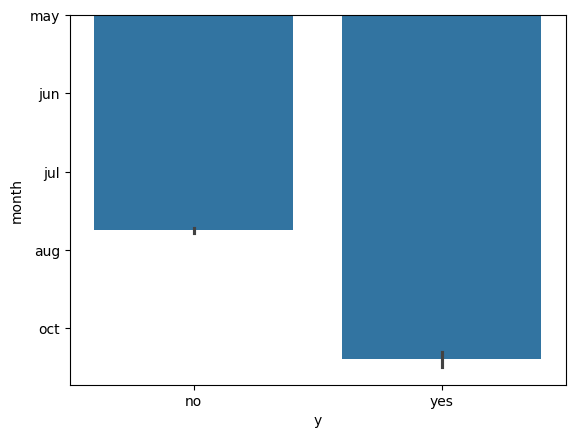

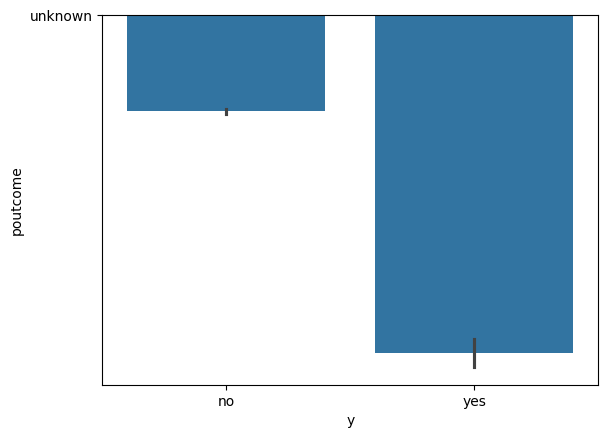

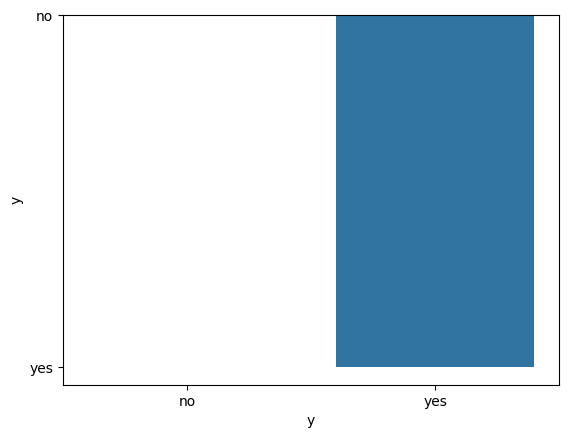

In [231]:
for col in cat:
    sns.barplot(data = df , x = "y" , y= col)
    plt.show()

In [232]:
cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [233]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
ohe= OneHotEncoder()
oe = OrdinalEncoder()

In [234]:


from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
oe = OrdinalEncoder()
lb = LabelEncoder()

for col in cat:
    if col in cat:
        df[col] = lb.fit_transform(df[[col]])
    else:
     df[col] = oe.fit_transform(df[col])




/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [235]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143.0,1,0,2,5,8,5.568345,1,-1,0,3,0
1,44,9,2,1,0,29.0,1,0,2,5,8,5.023881,1,-1,0,3,0
2,33,2,1,1,0,2.0,1,1,2,5,8,4.343805,1,-1,0,3,0
3,47,1,1,3,0,1506.0,1,0,2,5,8,4.532599,1,-1,0,3,0
4,33,11,2,3,0,1.0,0,0,2,5,8,5.293305,1,-1,0,3,0


In [236]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

# Store accuracies
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds) * 100
    accuracy_results[name] = acc
    print(f"Model Accuracies {name}(%): {acc:.2f}%")

Model Accuracies Logistic Regression(%): 88.70%
Model Accuracies Decision Tree(%): 86.93%
Model Accuracies Random Forest(%): 90.10%
Model Accuracies Support Vector Machine(%): 89.09%
Model Accuracies Naive Bayes(%): 82.45%
Model Accuracies K-Nearest Neighbors(%): 88.61%
Model Accuracies XGBoost(%): 90.30%
[LightGBM] [Info] Number of positive: 4208, number of negative: 31960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116346 -> initscore=-2.027498
[LightGBM] [Info] Start training from score -2.027498


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model Accuracies LightGBM(%): 90.51%
Model Accuracies CatBoost(%): 90.74%
